In [1]:
from adler.dataclasses.AdlerPlanetoid import AdlerPlanetoid
from adler.science.PhaseCurve import PhaseCurve

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy.units as u


In [2]:
# ssObjectId of object to analyse
ssoid = "8268570668335894776"

In [3]:
# retrieve the object data via adler
planetoid = AdlerPlanetoid(ssoid)

/home/jrob/adler/src/adler/dataclasses/DataSchema.py:34: UserWarning: Warning: converting a masked element to nan.
  return float(self.data_table[column_name][0])


In [4]:
# inspect the object
# dir(planetoid.Observations)
planetoid.Observations.__dict__

{'ssObjectId': '8268570668335894776',
 'sql_query': "\n            SELECT\n                ssObject.ssObjectId, mag, magErr, band, midpointMjdTai as mjd, ra, dec, phaseAngle,\n                topocentricDist, heliocentricDist\n            FROM\n                dp03_catalogs_10yr.ssObject\n                JOIN dp03_catalogs_10yr.diaSource ON dp03_catalogs_10yr.ssObject.ssObjectId   = dp03_catalogs_10yr.diaSource.ssObjectId\n                JOIN dp03_catalogs_10yr.ssSource  ON dp03_catalogs_10yr.diaSource.diaSourceId = dp03_catalogs_10yr.ssSource.diaSourceId\n            WHERE\n                ssObject.ssObjectId = 8268570668335894776 and band='r'\n            ",
 'service': <pyvo.dal.tap.TAPService at 0x7cf0e13e1db0>,
 'data_table': <Table length=38>
      ssObjectId       mag    magErr ... topocentricDist heliocentricDist
                                     ...        AU              AU       
        int64        float32 float32 ...     float32         float32     
 -----------------

In [5]:
getattr(planetoid.Observations,"phaseAngle")

array([ 18.636665 ,  31.88497  ,  30.160686 ,  27.637327 ,  37.81433  ,
        36.348026 ,  29.765968 ,  36.50101  ,  27.429834 ,  56.708397 ,
        48.8024   ,  31.867077 ,   9.175689 ,  39.98022  ,  26.91216  ,
        39.974342 ,  40.30449  ,  72.76689  ,  27.429777 ,  38.530846 ,
        27.739908 , 126.787056 ,  38.031944 ,  29.765924 ,  31.74269  ,
        33.562683 , 126.79137  ,   7.0533433,  32.005596 ,  36.34851  ,
        50.079884 ,  27.178923 ,  31.696053 ,   5.731951 , 126.78273  ,
        31.974665 ,   2.5533326,  26.898243 ], dtype=float32)

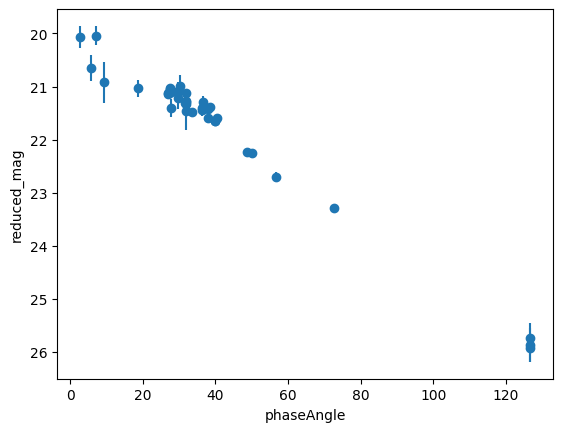

In [6]:
# plot the observations
x_plot = "phaseAngle"
y_plot = "reduced_mag"

x = getattr(planetoid.Observations, x_plot)
y = getattr(planetoid.Observations,y_plot)
xerr = planetoid.Observations.magErr

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0,0])

ax1.errorbar(x,y,xerr, fmt = "o")

ax1.invert_yaxis()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.show()

In [7]:
# define the phase curve
pc = PhaseCurve(abs_mag = planetoid.SSObject.r_H * u.mag,
                phase_param  = planetoid.SSObject.r_G12,
                model_name = "HG12_Pen16")

/home/jrob/.conda/envs/adler-dev/lib/python3.10/site-packages/sbpy/photometry/iau.py:50: InvalidPhaseFunctionWarning: G12 parameter could result in an invalid phsae function
  warnings.warn(msg, exception)


In [8]:
pc.model_function

<HG12_Pen16(H=19.80589294 mag, G12=1.52932608)>

In [9]:
alpha = np.linspace(0,np.amax(planetoid.Observations.phaseAngle)) * u.deg
alpha

<Quantity [  0.        ,   2.58757891,   5.17515782,   7.76273673,
            10.35031564,  12.93789455,  15.52547346,  18.11305237,
            20.70063128,  23.28821019,  25.8757891 ,  28.46336801,
            31.05094692,  33.63852583,  36.22610474,  38.81368365,
            41.40126256,  43.98884147,  46.57642038,  49.16399929,
            51.75157819,  54.3391571 ,  56.92673601,  59.51431492,
            62.10189383,  64.68947274,  67.27705165,  69.86463056,
            72.45220947,  75.03978838,  77.62736729,  80.2149462 ,
            82.80252511,  85.39010402,  87.97768293,  90.56526184,
            93.15284075,  95.74041966,  98.32799857, 100.91557748,
           103.50315639, 106.0907353 , 108.67831421, 111.26589312,
           113.85347203, 116.44105094, 119.02862985, 121.61620876,
           124.20378767, 126.79136658] deg>

In [10]:
red_mag = pc.ReducedMag(alpha)
red_mag

<Quantity [19.80589295, 19.92035462, 20.05205158, 20.20289499, 20.36056619,
           20.51314093, 20.6584576 , 20.79460082, 20.92025081, 21.03510523,
           21.14028241, 21.23864429, 21.33496854, 21.4328029 , 21.53235116,
           21.63356172, 21.73636196, 21.84065497, 21.94631645, 22.05319171,
           22.16109332, 22.26979979, 22.37905599, 22.48857609, 22.59803543,
           22.70697432, 22.81482593, 22.92096063, 23.02470165, 23.12535025,
           23.22222176, 23.31469242, 23.40225513, 23.48458066, 23.56157882,
           23.6334516 , 23.70029421, 23.761468  , 23.81627732, 23.86411552,
           23.9045047 , 23.9371306 , 23.96186796, 23.97879245, 23.98817765,
           23.99047722, 23.98629539, 23.97653042, 23.96457121, 23.95543471] mag>

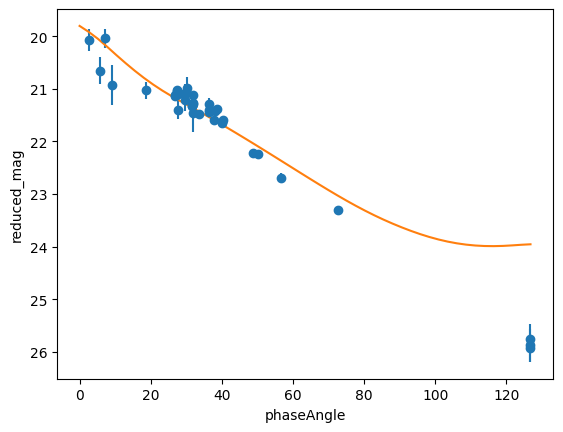

In [11]:
# %matplotlib widget

# plot the observations with the LSST phase curve
x_plot = "phaseAngle"
y_plot = "reduced_mag"

x = getattr(planetoid.Observations, x_plot)
y = getattr(planetoid.Observations,y_plot)
xerr = planetoid.Observations.magErr

fig = plt.figure()
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0,0])

ax1.errorbar(x,y,xerr, fmt = "o")

ax1.plot(alpha.value,red_mag.value)

ax1.invert_yaxis()
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

plt.show()